# preliminary

In [1]:
import pickle, os
import numpy as np
from numpy.linalg import matrix_power

root_path = '/Users/jiahang/Documents/dagma/src/dagma/'
n_nodes = 60

import sys
sys.path.append('/Users/jiahang/Documents/dagma/src/dagma/')

import deconv
from importlib import reload
reload(deconv)

import matplotlib.pyplot as plt
import utils_dagma

In [95]:
with open(os.path.join(root_path, 'simulated_data/v13/v60/W/W_2_0.pkl'), 'rb') as f:
    W_2_0 = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v13/v60/X/X_1.pkl'), 'rb') as f:
    X = pickle.load(f)
with open(os.path.join(root_path, 'simulated_data/v13/v60/knockoff/knockoff_2.pkl'), 'rb') as f:
    knockoff = pickle.load(f)
    
W = W_2_0['W_est'][:, :n_nodes]
W_ori, W_kno = W[:n_nodes, :], W[n_nodes:, :]
W_true = X['W_true']
B_true = (W_true != 0)
W_est = W_2_0['W_est']
X1 = X['X']

# distributions of X and knockoff X

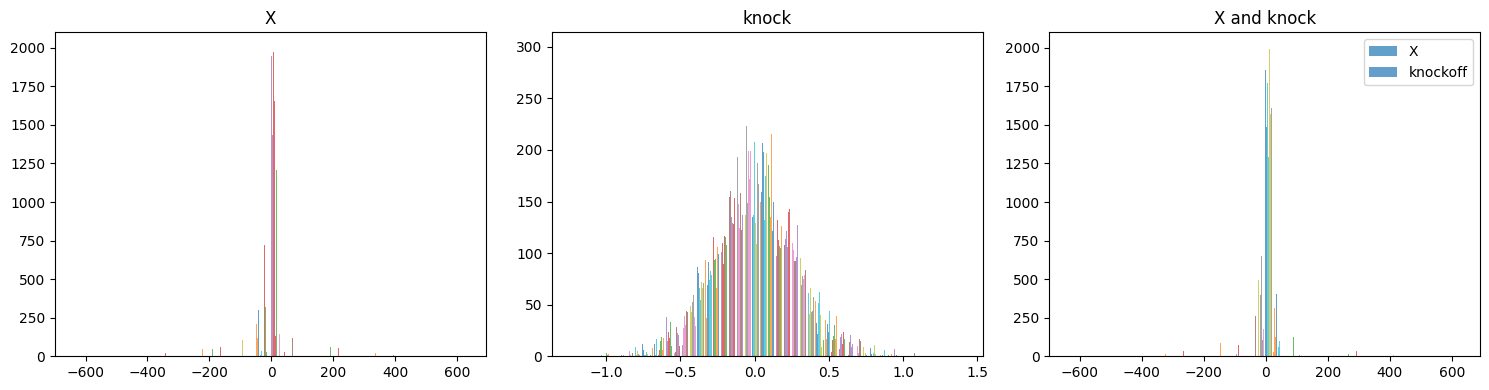

In [137]:
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

X1 = X['X']

axs[0].hist(X1, bins=50, alpha=0.7)
axs[0].set_title('X')
axs[1].hist(knockoff, bins=50, alpha=0.7)
axs[1].set_title('knock')
axs[2].hist(X1, bins=50, density=False, alpha=0.7, label='X')
axs[2].hist(knockoff, bins=50, density=False, alpha=0.7, label='knockoff')
axs[2].set_title('X and knock')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

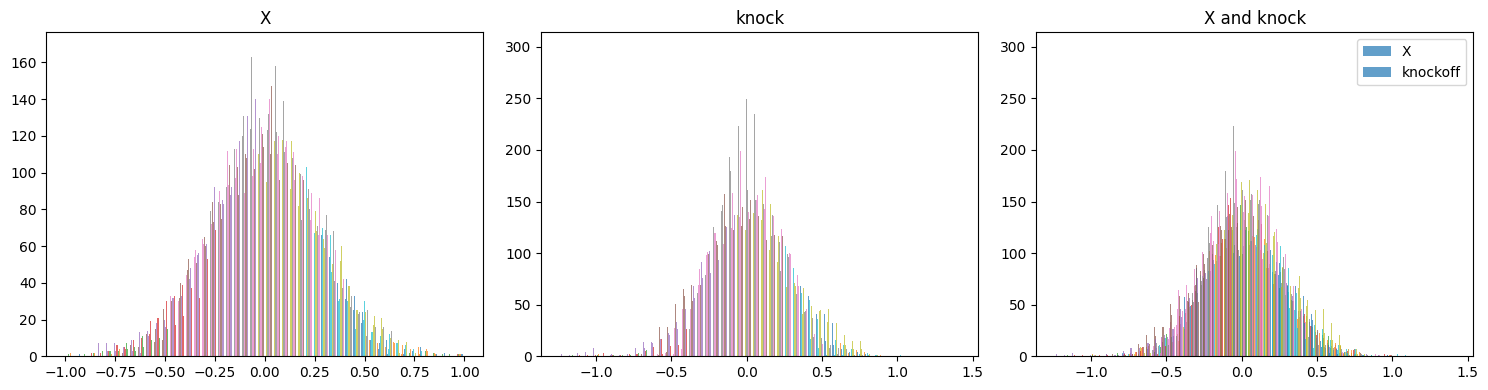

In [138]:
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

max_abs_col = np.abs(X['X']).max(axis=0).reshape(1, -1)
X1 = X['X'] / (max_abs_col + 1e-8)

axs[0].hist(X1, bins=50, density=False, alpha=0.7)
axs[0].set_title('X')
axs[1].hist(knockoff, bins=50, density=False, alpha=0.7)
axs[1].set_title('knock')
axs[2].hist(X1, bins=50, density=False, alpha=0.7, label='X')
axs[2].hist(knockoff, bins=50, density=False, alpha=0.7, label='knockoff')
axs[2].set_title('X and knock')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

# distributions of knockoff statistics

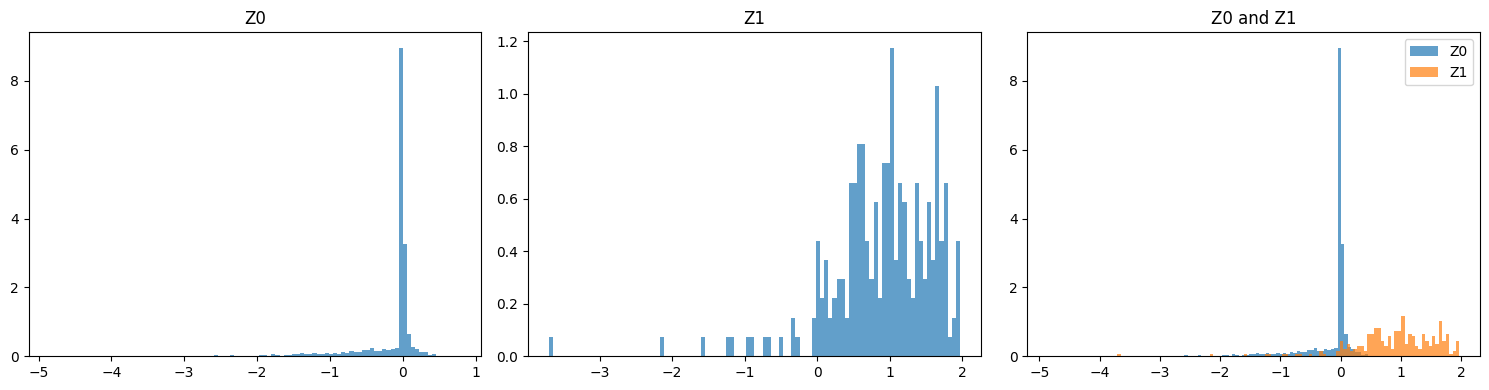

In [3]:
Z = np.abs(W[:n_nodes, :n_nodes]) - np.abs(W[n_nodes:, :n_nodes])
Z0, Z1 = Z[~B_true], Z[B_true]
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].hist(Z0, bins=100, density=True, alpha=0.7)
axs[0].set_title('Z0')
axs[1].hist(Z1, bins=100, density=True, alpha=0.7)
axs[1].set_title('Z1')
axs[2].hist(Z0, bins=100, density=True, alpha=0.7, label='Z0')
axs[2].set_title('Z0 and Z1')
axs[2].hist(Z1, bins=100, density=True, alpha=0.7, label='Z1')
axs[2].set_title('Z0 and Z1')

# Adjust spacing between subplots
plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

In [130]:
print(f'Z0 > 5e-1: {(Z0 > 5e-1).sum() / Z0.shape[0] * 100:.2f}%')
print(f'Z0 < -5e-1: {(Z0 < -5e-1).sum() / Z0.shape[0] * 100:.2f}%')

Z0 > 5e-1: 0.30%
Z0 < -5e-1: 13.36%


In [61]:
print(f'Z1 > 5e-1: {(Z1 > 5e-1).sum() / Z1.shape[0] * 100:.2f}%')
print(f'Z1 < -5e-1: {(Z1 < -5e-1).sum() / Z1.shape[0] * 100:.2f}%')

Z1 > 5e-1: 77.50%
Z1 < -5e-1: 4.17%


# distributions of weights of null and knockoff

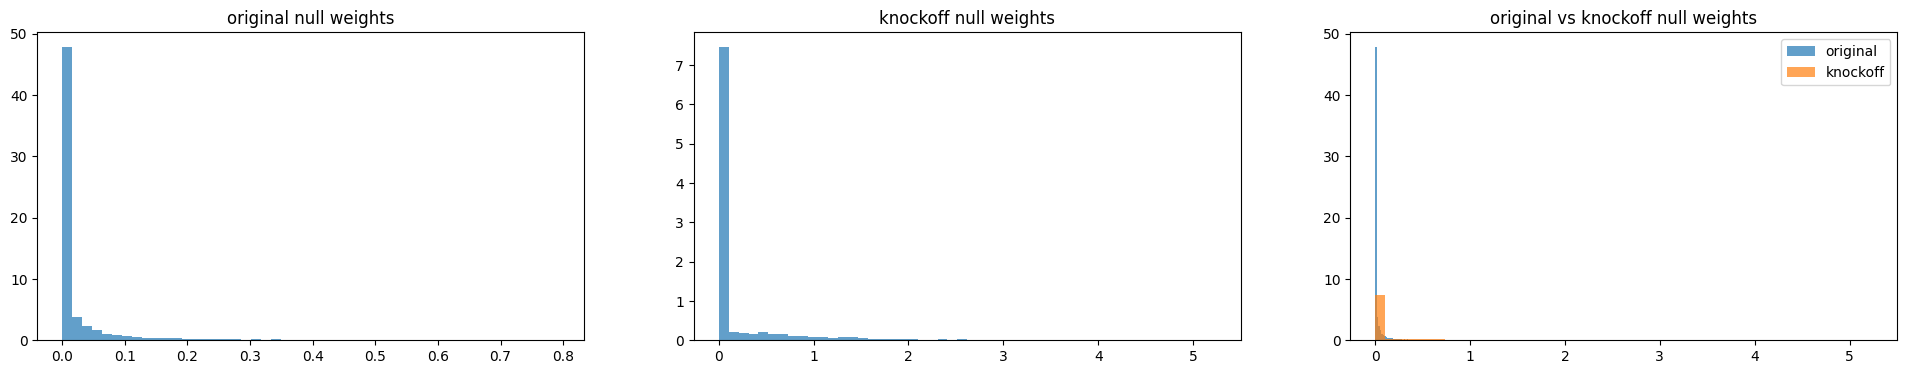

In [33]:
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(24, 4))

axs[0].hist(np.abs(W_ori[~B_true]), bins=50, density=True, alpha=0.7)
axs[0].set_title('original null weights')

axs[1].hist(np.abs(W_kno[~B_true]), bins=50, density=True, alpha=0.7)
axs[1].set_title('knockoff null weights')

axs[2].hist(np.abs(W_ori[~B_true]), bins=50, density=True, alpha=0.7, label='original')
axs[2].hist(np.abs(W_kno[~B_true]), bins=50, density=True, alpha=0.7, label='knockoff')
axs[2].set_title('original vs knockoff null weights')

# Adjust spacing between subplots
# plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

In [132]:
(np.abs(W_kno[~B_true]) > 1.).sum() / (~B_true).sum() * 100

7.559523809523809

# distributions of weights of true and knockoff

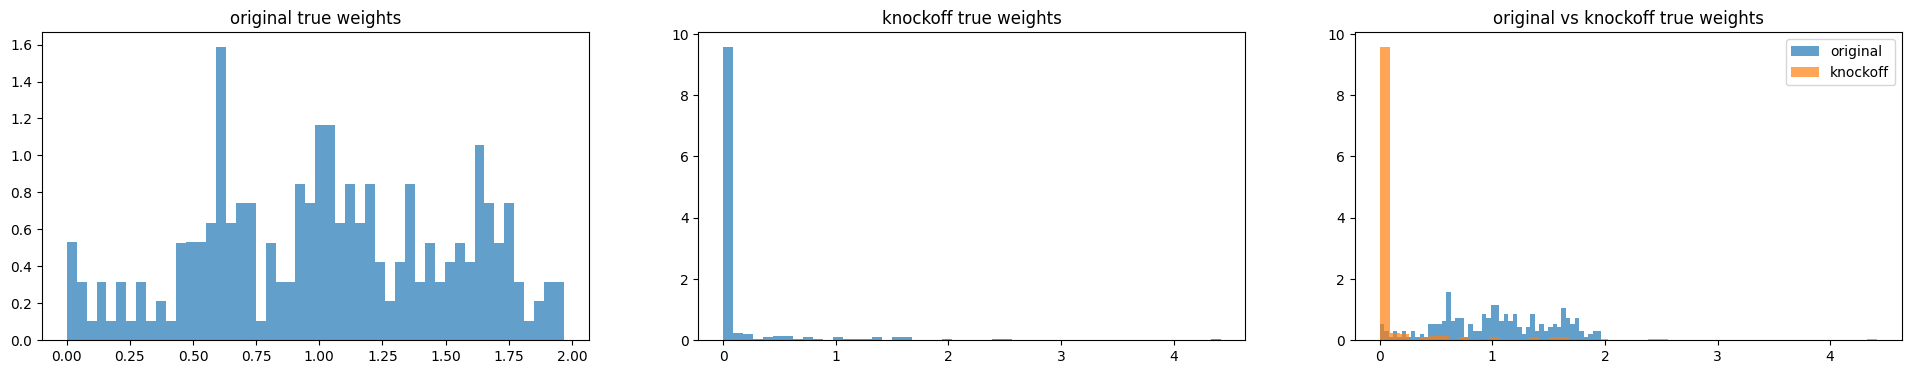

In [62]:
# import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(24, 4))

axs[0].hist(np.abs(W_ori[B_true]), bins=50, density=True, alpha=0.7)
axs[0].set_title('original true weights')

axs[1].hist(np.abs(W_kno[B_true]), bins=50, density=True, alpha=0.7)
axs[1].set_title('knockoff true weights')

axs[2].hist(np.abs(W_ori[B_true]), bins=50, density=True, alpha=0.7, label='original')
axs[2].hist(np.abs(W_kno[B_true]), bins=50, density=True, alpha=0.7, label='knockoff')
axs[2].set_title('original vs knockoff true weights')

# Adjust spacing between subplots
# plt.tight_layout()
plt.legend()

# Show the plot
plt.show()

# distribution of knockoff statistics of null edges across orders

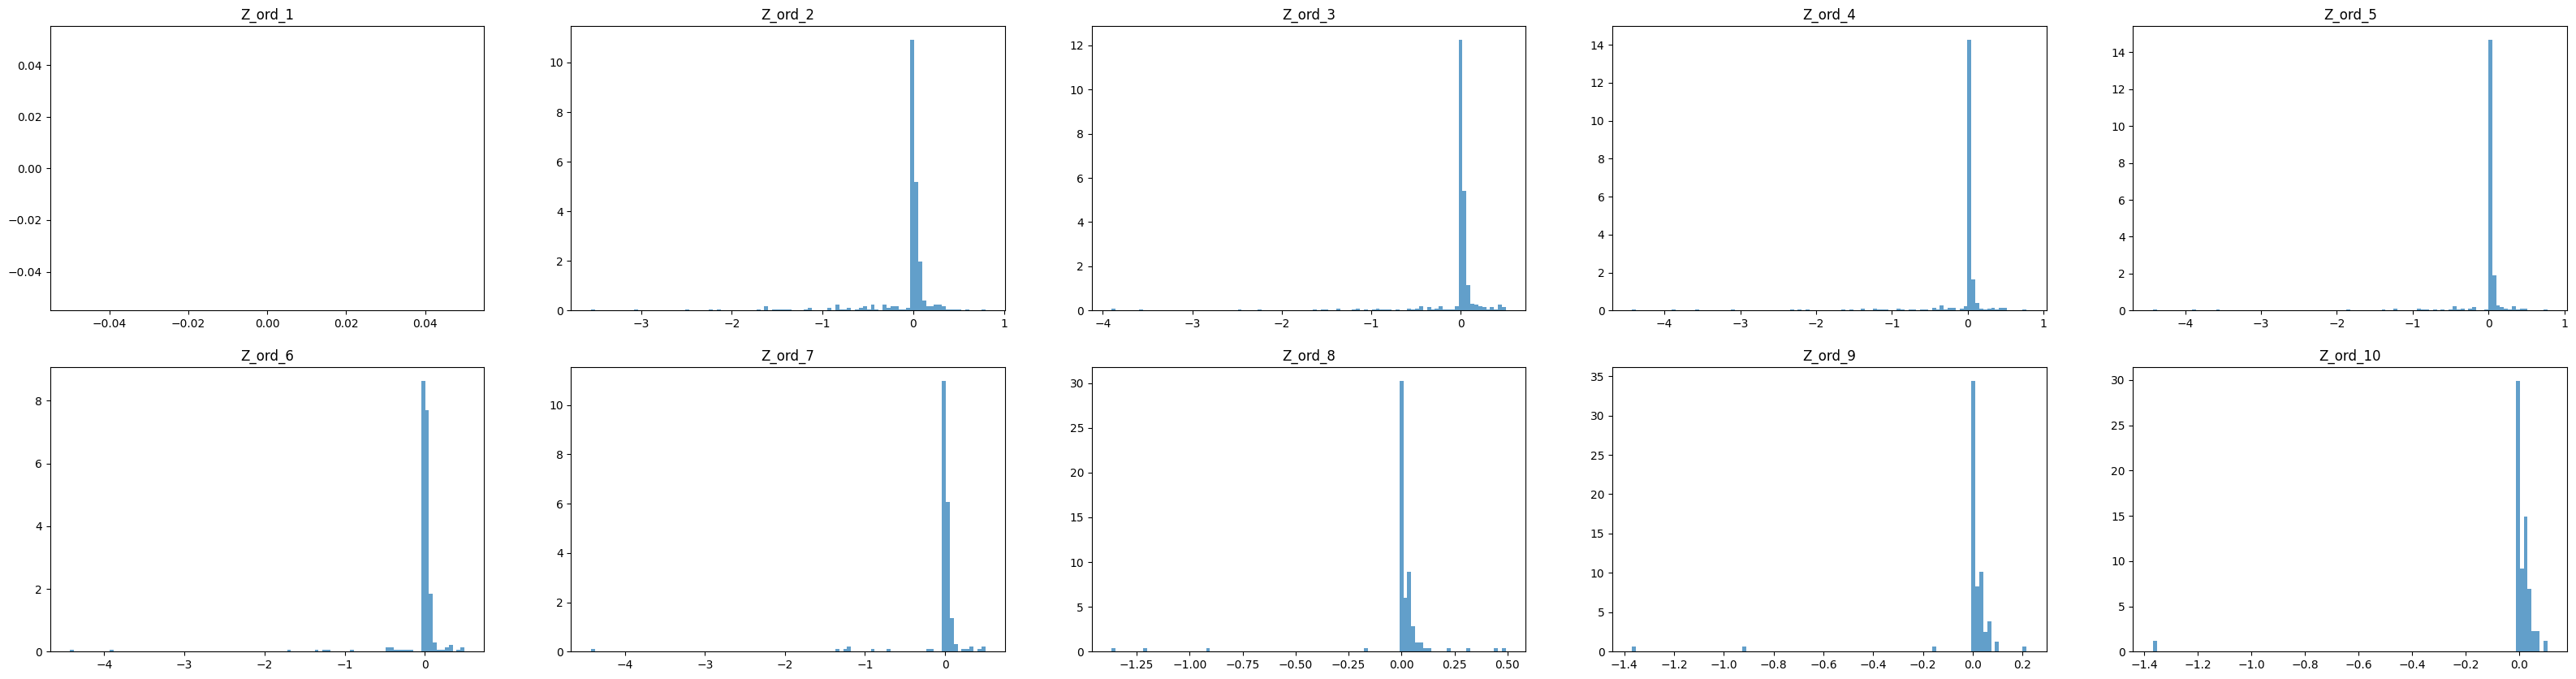

In [48]:
W_true_powers = [matrix_power(W_true, i) for i in range(1, 11)]
B_true_powers = [W != 0 for W in W_true_powers]

# import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 5, figsize=(40, 10))
for i in range(2):
    for j in range(5):
        idx = j + i * 5
        mask = B_true_powers[idx] & ~B_true_powers[0] # get cascaded null edges
        Z_ord = np.abs(W_ori[mask]) - np.abs(W_kno[mask])
        axs[i][j].hist(Z_ord, bins=100, density=True, alpha=0.7)
        axs[i][j].set_title(f'Z_ord_{idx+1}')

# Adjust spacing between subplots
# plt.tight_layout()

# Show the plot
plt.show()

# distribution of weights of null and knockoff edges across orders

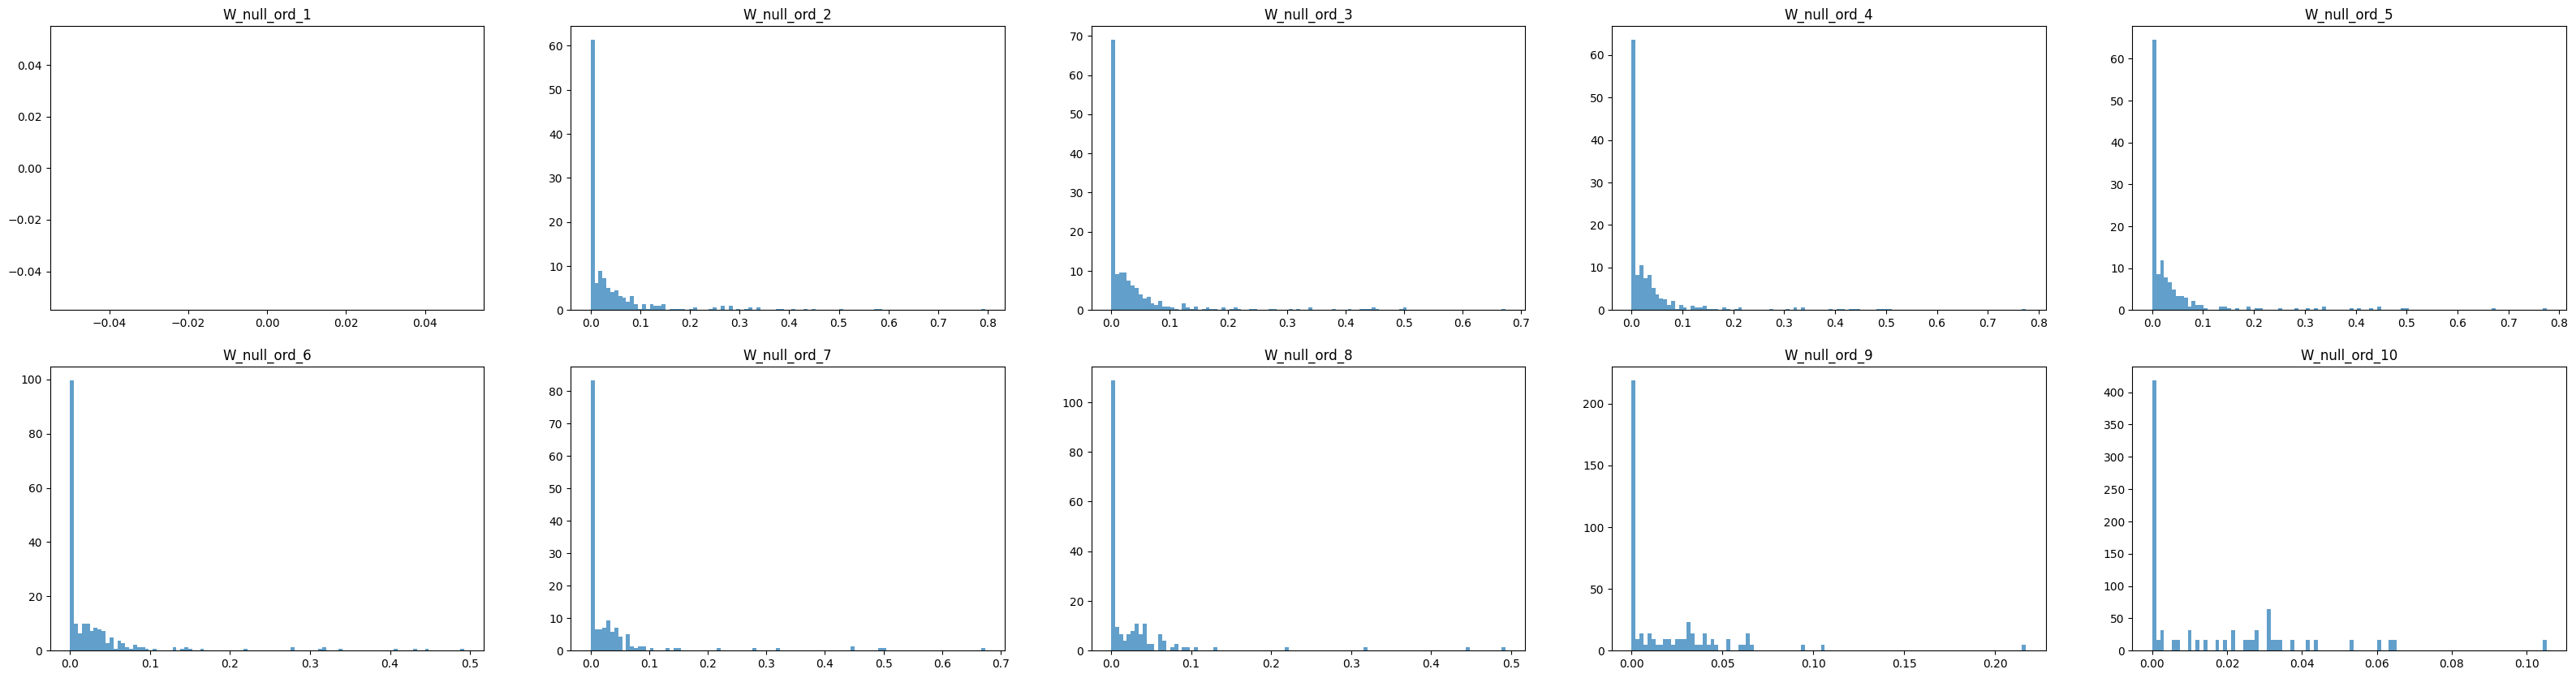

In [47]:
W_true_powers = [matrix_power(W_true, i) for i in range(1, 11)]
B_true_powers = [W != 0 for W in W_true_powers]

# import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 5, figsize=(40, 10))
for i in range(2):
    for j in range(5):
        idx = j + i * 5
        mask = B_true_powers[idx] & ~B_true_powers[0] # get cascaded null edges
        axs[i][j].hist(np.abs(W_ori[mask]), bins=100, density=True, alpha=0.7)
        axs[i][j].set_title(f'W_null_ord_{idx+1}')

# Adjust spacing between subplots
# plt.tight_layout()

# Show the plot
plt.show()

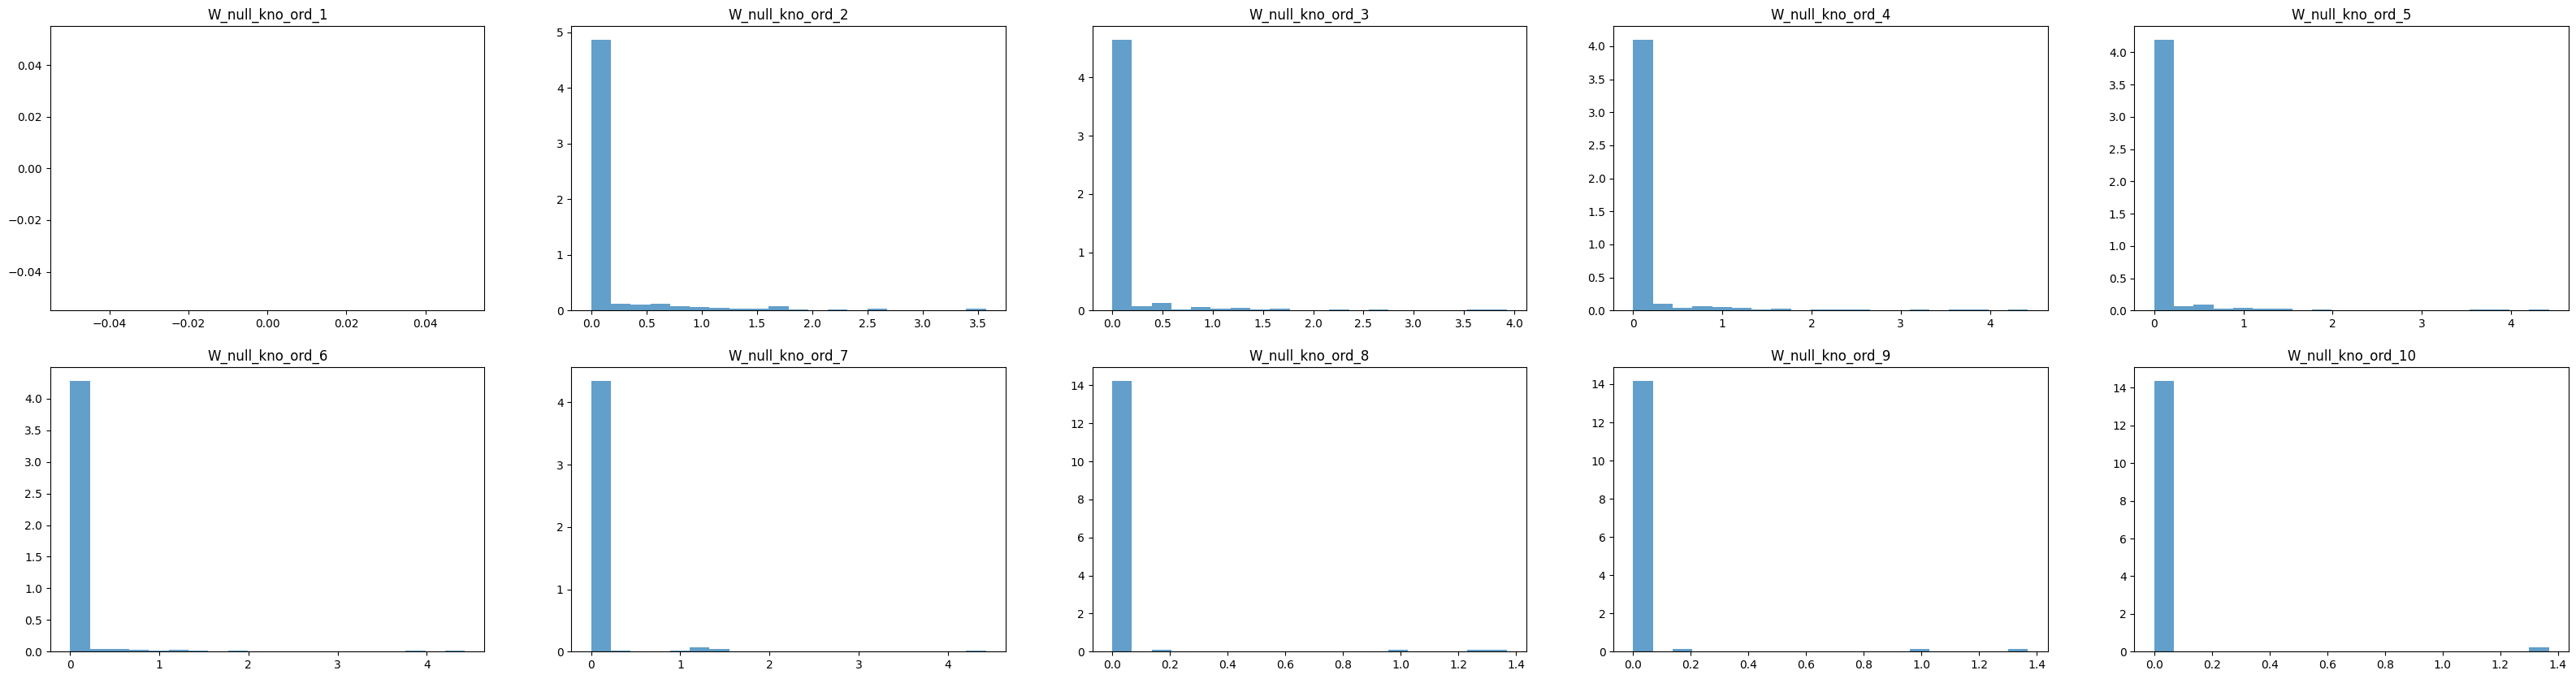

In [45]:
W_true_powers = [matrix_power(W_true, i) for i in range(1, 11)]
B_true_powers = [W != 0 for W in W_true_powers]

# import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 5, figsize=(40, 10))
for i in range(2):
    for j in range(5):
        idx = j + i * 5
        mask = B_true_powers[idx] & ~B_true_powers[0] # get cascaded null edges
        axs[i][j].hist(np.abs(W_kno[mask]), bins=20, density=True, alpha=0.7)
        axs[i][j].set_title(f'W_null_kno_ord_{idx+1}')

# Adjust spacing between subplots
# plt.tight_layout()

# Show the plot
plt.show()

In [75]:
# find null cascaded egdes with order 2
mask = B_true_powers[1] & ~B_true_powers[0] # get cascaded null edges
W_null_2, W_null_kno_2 = np.abs(W_ori.copy()), np.abs(W_kno.copy())
W_null_2[~mask], W_null_kno_2[~mask] = 0., 0.

In [111]:
# find all null cascaded 2 edges with knockoff weights > 1
mask_1 = (W_null_kno_2 > 1)
W_null_2[mask_1]

array([4.12659707e-01, 2.63793151e-01, 1.84667052e-01, 1.22484920e-03,
       1.96351251e-05, 1.41027124e-01, 5.34941281e-02, 3.84613395e-01,
       1.32057081e-01, 6.07208505e-02, 1.40319782e-01, 1.20700185e-05,
       1.77086086e-02, 3.17937416e-02, 1.37722370e-01, 2.47602544e-02,
       9.89107739e-02, 1.23192809e-01, 1.79602905e-01, 7.71999471e-02])

In [112]:
W_null_kno_2[mask_1]

array([2.62692217, 1.11029671, 1.0328704 , 1.14410299, 1.36868027,
       1.85188384, 1.246758  , 3.418968  , 1.63965026, 1.61015126,
       2.61192049, 1.621799  , 3.57292296, 1.66532624, 1.60127256,
       2.15081065, 1.03316244, 1.25713395, 1.56306113, 1.69118654])

In [113]:
np.where(mask_1)

(array([ 3,  4,  7,  9, 18, 18, 18, 23, 25, 26, 26, 34, 39, 39, 41, 41, 51,
        51, 51, 54]),
 array([53, 54, 54, 36,  5, 10, 58, 27, 12,  5,  6,  8, 17, 50, 10, 49, 31,
        46, 54, 29]))

In [115]:
# take one null edge (3, 53) of which the knockoff weight is 2.63, but its own weight is 0.4
mask_1[3, 53]

True

In [117]:
# original X[:, 3]
X1[3]

array([ 1.44214670e+00, -2.95993697e+00, -1.87755768e+00, -7.04094161e-01,
       -1.61084591e+00, -2.09054131e+01,  1.53391165e+01,  3.88218931e+00,
       -6.50866452e-01, -8.57131315e-01,  2.25310854e+00, -1.24004360e+01,
       -1.63370665e+01,  4.10052646e+00,  7.97867058e+00,  3.81074069e-01,
        9.56493098e-01,  2.34050568e+00, -9.12298106e-01, -8.45604274e+00,
       -5.73101991e-01, -2.12100927e+02, -2.66545778e-01, -5.59593633e-01,
        5.82518555e+01,  4.05042261e-01,  5.37226915e-01, -6.66309092e-01,
        2.05149252e+00,  1.27857376e+00, -3.55050463e+01,  6.09463769e+00,
       -9.14511852e-01, -1.32422644e+00, -1.11574870e-01, -1.45299419e+01,
        4.19011521e-01,  5.93736215e-01, -5.98645973e-01,  1.82786250e+00,
        8.37411748e-02,  9.37201558e-01, -1.44008633e+02,  2.18140584e+02,
       -5.12108674e+00,  1.57418037e+00,  2.26423244e+00,  1.26758966e+00,
       -1.19050951e+00,  1.20906049e+00,  3.55440433e+00, -4.01403059e-01,
        1.20727935e+00,  

In [118]:
# knockoff X'[:, 3]
knockoff[3]

array([ 0.03390633, -0.23489195,  0.10644402, -0.01147347, -0.00819184,
       -0.10776146, -0.3143122 ,  0.1500397 , -0.73998487,  0.3153908 ,
        0.31406122, -0.18346825, -0.1490814 , -0.5074496 , -0.09873543,
       -0.1538584 , -0.01797657,  0.19812822,  0.01690527,  0.01952037,
       -0.36351657,  0.07947314, -0.03107301, -0.11373268,  0.35187647,
       -0.58391476, -0.58506584,  0.5320874 , -0.131011  , -0.02506173,
        0.37610936,  0.15503731,  0.06238703,  0.04020302, -0.44168046,
        0.12229249, -0.01730673,  0.07176778,  0.41910124,  0.11516321,
       -0.5154815 ,  0.28651348, -0.13972965,  0.14796154, -0.19299902,
        0.03520678,  0.0604733 ,  0.19210105, -0.16374223, -0.06987675,
        0.15869395,  0.28006127,  0.24135795, -0.02573435,  0.14834237,
        0.0585842 ,  0.24578455, -0.07813463,  0.16822265,  0.28261042],
      dtype=float32)

In [119]:
# original X[:, 53]
X1[53]

array([-5.72028874e-01, -2.11548645e+00,  6.91729619e+00,  3.96738952e-01,
        1.38209298e+00, -9.37671569e+00,  4.62175053e+00,  3.93859858e-01,
        1.82142164e+00,  2.99323234e-01,  6.81283318e-01, -5.04142969e-01,
        3.09638586e+00, -1.41622546e+00,  5.82151416e+00,  7.98981800e-01,
        1.42231566e+00, -4.74193420e+00,  7.47696767e-01,  2.40063547e+00,
        7.10642302e+00, -1.26958459e+01,  1.93862160e+00, -8.77628233e-01,
        1.83966645e+01, -1.74782204e-01,  6.96668470e-01, -2.16055944e+00,
       -5.62169911e+01,  4.69897083e+00,  1.02426825e+01,  6.81069415e+00,
        4.57217104e-01,  1.76271588e+00,  3.06944295e-02,  1.42751843e+01,
       -1.48396614e+00, -5.12779812e-01,  3.74679053e-01,  1.34891867e+00,
        2.30703407e+00, -8.60579366e-01, -9.94396582e+00,  2.56302485e+01,
        2.16562181e+00, -2.87611277e-01,  1.30273972e+00, -1.53651227e+00,
       -2.54502718e+00,  3.21238275e+00,  6.53293336e+00,  5.70862718e-01,
        1.17639651e+01,  

In [120]:
# the scale of original X[:, 3]
np.abs(X1[3]).min()

0.08374117484982568

In [121]:
np.abs(X1[3]).max()

218.1405839400965

In [122]:
# the scale of knockoff X'[:, 3]
np.abs(knockoff[3]).min()

0.008191841

In [123]:
# X[3] has much larger scale than X'[3]
np.abs(knockoff[3]).max()

0.73998487

In [124]:
# the linear(pearson) correlation between X[3] and X[53]
np.corrcoef(X1[3], X1[53])

array([[1.        , 0.42011405],
       [0.42011405, 1.        ]])

In [ ]:
X2[3] = 

In [125]:
# the linear(pearson) correlation between X'[3] and X[53]
# it's obvious that X[3] is more linearly correlated with X[53] than X'[3]
np.corrcoef(knockoff[3], X1[53])

array([[1.        , 0.13595902],
       [0.13595902, 1.        ]])

In [126]:
# the learned weight from X[3] to X[53]
W[3, 53]

0.41265970721808454

In [128]:
# the learned weight from X'[3] (position is 60 + 3) to X[53]
# although X[3] is more correlated with X[53], the weight of X[3] is smaller than X'[3]
# this is because X[3] has smaller scale than X'[3].

"""
Conclusion: similar to lasso regression, feature normalization is needed 
before lasso regression if feature selection is needed
"""
W[63, 53]

2.6269221728461494